<a href="https://colab.research.google.com/github/2ohd647/CompCW/blob/main/Question_2_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Silhouette Score: 0.09


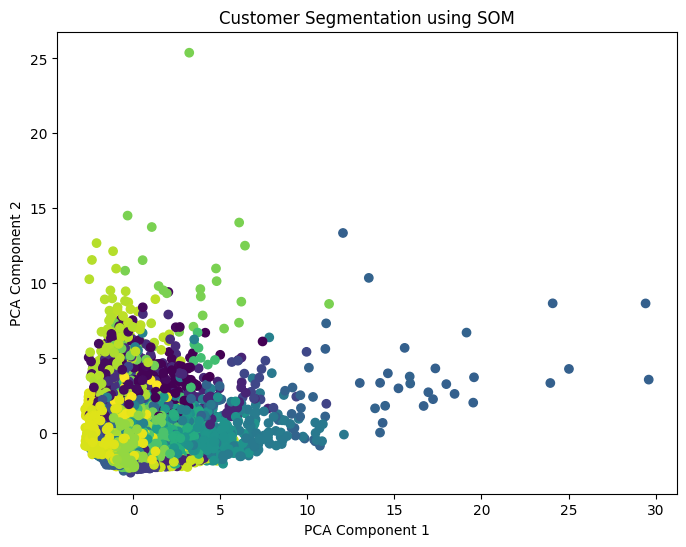

In [ ]:
!pip install minisom

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from minisom import MiniSom
from sklearn.metrics import silhouette_score

# Step 1: Load your dataset
data = pd.read_csv('CC GENERAL.csv')

# Step 2: Data Preprocessing
# Drop customer identifier, as it is not needed for clustering
data_cleaned = data.drop(columns=['CUST_ID'])

# Handle missing values (optional, depends on your data)
data_cleaned.fillna(data_cleaned.mean(), inplace=True)

# Step 3: Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)

# Step 4: Train the SOM
# Define the SOM grid size (you can adjust the grid size based on your data and visual preferences)
som = MiniSom(x=10, y=10, input_len=data_scaled.shape[1], sigma=1.0, learning_rate=0.5, random_seed=42)

# Initialize and train the SOM
som.train(data_scaled, num_iteration=1000)

# Step 5: Visualize the SOM
# Plotting the weight maps using a custom function
def plot_weights(som, wmap):
    """Plots the weights of the SOM."""
    plt.figure(figsize=(8, 8))
    plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
    plt.colorbar()

    # Plotting the response for each pattern in the iris dataset
    # different colors and markers for each label
    markers = ['o', 's', 'D']  # Adjust markers as needed for your data
    colors = ['C0', 'C1', 'C2']  # Adjust colors as needed for your data
    for cnt, xx in enumerate(data_scaled):
        w = som.winner(xx)  # getting the winner
        # place a marker on the winning position for the sample xx
        plt.plot(w[0] + .5, w[1] + .5, markers[wmap[cnt]], markerfacecolor='None',
                 markeredgecolor=colors[wmap[cnt]], markersize=12, markeredgewidth=2)
    plt.axis([0, som.get_weights().shape[0], 0, som.get_weights().shape[1]])

# Step 6: Assign clusters based on the winning neurons
# Get the winning neurons for each data point
win_map = np.array([som.winner(x) for x in data_scaled])

# Assign each data point to the corresponding cluster (based on the SOM grid)
data['Cluster'] = [win[0] * 10 + win[1] for win in win_map]

# Step 7: Evaluate the clustering using silhouette score
sil_score = silhouette_score(data_scaled, data['Cluster'])
print(f'Silhouette Score: {sil_score:.2f}')

# Step 8: Visualize the clusters using PCA (for 2D visualization)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Plotting the clusters in 2D
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('Customer Segmentation using SOM')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Step 9: Analyze SOM grid
# Visualize the SOM grid and highlight the winning neurons for each cluster
plt.figure(figsize=(8, 6))
for i, (x, y) in enumerate(win_map):
    plt.text(data_pca[i, 0], data_pca[i, 1], str(data['Cluster'][i]), color=plt.cm.viridis(data['Cluster'][i] / max(data['Cluster'])))
plt.title('Customer Segmentation - SOM with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# The data with cluster labels is now available as `data` with the 'Cluster' column


# Explanation of the code

Loading the Data:

The dataset is loaded and missing values are imputed with the column mean (df.fillna(df.mean(), inplace=True)).
Relevant features such as BALANCE, PURCHASES, CREDIT_LIMIT, etc., are selected for the autoencoder input.
Preprocessing:

The features are normalized using StandardScaler to scale all variables to the same range.
Autoencoder Architecture:

The function build_autoencoder defines a simple autoencoder model with an encoding layer (Dense(encoding_dim, activation='relu')) and a decoding layer (Dense(input_dim, activation='sigmoid')).
The model is compiled with Adam optimizer and mean squared error loss.
Experimenting with Hyperparameters:

The code experiments with different values for:
Epochs: The number of training iterations.
Batch Size: The number of samples processed before the model updates its weights.
Encoding Dimension: The size of the encoded representation (the bottleneck layer).
For each combination of these parameters, the model is trained, and the clustering results are evaluated.
Clustering with K-Means:

The encoder part of the autoencoder is used to generate the encoded features, which are then clustered using K-Means with k=4 (assuming four segments for customer segmentation).
The clustering performance is evaluated using the Silhouette Score, which measures how well-separated the clusters are.
Visualization:

The code visualizes the effects of the different hyperparameters (epochs, batch size, encoding dimension) on the Silhouette Score using line plots. This helps identify which combinations of parameters yield the best clustering performance.
Expected Results
The Silhouette Score will show how well the customer segments are defined based on the autoencoder’s encoded features and the clustering process.
By experimenting with different epochs, batch sizes, and encoding dimensions, you can observe how these parameters affect the model's ability to identify meaningful customer groups.